In [ ]:
from huggingface_hub import hf_hub_download
import torch, open_clip
from PIL import Image
from IPython.display import display

model_name = 'RN50' # 'RN50' or 'ViT-B-32' or 'ViT-L-14'
model, _, preprocess = open_clip.create_model_and_transforms(model_name)
tokenizer = open_clip.get_tokenizer(model_name)

path_to_your_checkpoints = 'checkpoints/models--chendelong--RemoteCLIP/snapshots/bf1d8a3ccf2ddbf7c875705e46373bfe542bce38'

ckpt = torch.load(f"{path_to_your_checkpoints}/RemoteCLIP-{model_name}.pt", map_location="cpu")
message = model.load_state_dict(ckpt)
print(message)
model = model.cuda().eval()

In [56]:
import json
with open('/mnt/data1/workspace/data/data/objects365v1/annotations/objects365_val.json', 'r') as file:
    data = json.load(file)
print(data.keys())

dict_keys(['images', 'licenses', 'categories', 'annotations', 'info', 'type'])


In [57]:
data['annotations']

[{'id': 0,
  'category_id': 21,
  'bbox': [133.8088989172, 178.6294555648, 80.1972656534, 124.0086669824],
  'image_id': 354609,
  'iscrowd': 0,
  'area': 9945.156009311546},
 {'id': 1,
  'category_id': 3,
  'bbox': [289.74798586220004,
   215.75781248,
   127.72149654100002,
   105.44451906559996],
  'image_id': 354609,
  'iscrowd': 0,
  'area': 13467.531777104436},
 {'id': 2,
  'category_id': 3,
  'bbox': [339.4999999909, 279.6185912832, 258.41333009830004, 211.6315918336],
  'image_id': 354609,
  'iscrowd': 0,
  'area': 54688.424399724776},
 {'id': 3,
  'category_id': 7,
  'bbox': [495.3330078154,
   234.7993164288,
   45.82702636130006,
   64.92156979200001],
  'image_id': 354609,
  'iscrowd': 0,
  'area': 2975.162490274966},
 {'id': 4,
  'category_id': 1,
  'bbox': [71.744506816, 60.36883545599999, 568.121826176, 419.055358896],
  'image_id': 567733,
  'iscrowd': 0,
  'area': 238074.4957648346},
 {'id': 5,
  'category_id': 22,
  'bbox': [303.98278809600004,
   448.62030028799995,


In [34]:
len(data['categories'])

365

In [35]:
# for i in data['categories']:
#     if 'tissue' in i['name']:
#         print(i)

{'name': 'tissue ', 'id': 159}


In [36]:
# for i in data['categories']:
#     if 'tissue' in i['name']:
#         i['name'] = 'tissue'

In [39]:
# for i in data['categories']:
#     if 'tissue' in i['name']:
#         print(i)

{'name': 'tissue', 'id': 159}


In [38]:
# with open('/mnt/data1/workspace/data/data/objects365v1/annotations/objects365_train.json', 'w') as file:
#     json.dump(data, file)

In [34]:
data['images']

[{'file_name': 'obj365_val_000000354609.jpg',
  'id': 354609,
  'width': 683,
  'height': 512},
 {'file_name': 'obj365_val_000000567733.jpg',
  'id': 567733,
  'width': 640,
  'height': 480},
 {'file_name': 'obj365_val_000000288141.jpg',
  'id': 288141,
  'width': 683,
  'height': 512},
 {'file_name': 'obj365_val_000000364389.jpg',
  'id': 364389,
  'width': 683,
  'height': 512},
 {'file_name': 'obj365_val_000000050630.jpg',
  'id': 50630,
  'width': 766,
  'height': 512},
 {'file_name': 'obj365_val_000000275118.jpg',
  'id': 275118,
  'width': 766,
  'height': 512},
 {'file_name': 'obj365_val_000000250279.jpg',
  'id': 250279,
  'width': 512,
  'height': 609},
 {'file_name': 'obj365_val_000000399735.jpg',
  'id': 399735,
  'width': 683,
  'height': 512},
 {'file_name': 'obj365_val_000000565313.jpg',
  'id': 565313,
  'width': 640,
  'height': 427},
 {'file_name': 'obj365_val_000000636398.jpg',
  'id': 636398,
  'width': 640,
  'height': 427},
 {'file_name': 'obj365_val_000000054597.j

In [65]:
data['annotations'][6]

{'iscrowd': 0,
 'image_id': 693364,
 'bbox': [91.6730347008, 0.3104858624, 508.567321728, 510.3496704],
 'id': 6,
 'area': 259547.16502009556,
 'category_id': 1}

In [45]:
data['categories']

[{'name': 'target', 'id': 360},
 {'name': 'electronic stove and gas stove', 'id': 197},
 {'name': 'key', 'id': 266},
 {'name': 'pine apple', 'id': 229},
 {'name': 'billiards', 'id': 187},
 {'name': 'piano', 'id': 155},
 {'name': 'washing machine', 'id': 161},
 {'name': 'basket', 'id': 42},
 {'name': 'sandals', 'id': 54},
 {'name': 'green vegetables', 'id': 263},
 {'name': 'cue', 'id': 257},
 {'name': 'ship', 'id': 216},
 {'name': 'cookies', 'id': 163},
 {'name': 'facial mask', 'id': 194},
 {'name': 'urinal', 'id': 313},
 {'name': 'tent', 'id': 122},
 {'name': 'sandwich', 'id': 256},
 {'name': 'chair', 'id': 3},
 {'name': 'potato', 'id': 184},
 {'name': 'hot dog', 'id': 208},
 {'name': 'bowl', 'id': 30},
 {'name': 'mop', 'id': 329},
 {'name': 'starfish', 'id': 349},
 {'name': 'baseball', 'id': 170},
 {'name': 'ring', 'id': 62},
 {'name': 'goldfish', 'id': 284},
 {'name': 'globe', 'id': 268},
 {'name': 'picture/frame', 'id': 11},
 {'name': 'bicycle', 'id': 59},
 {'name': 'balloon', 'id':

In [69]:
import json
with open("/mnt/data1/workspace/data/data/HRRSD/TGRS-HRRSD-Dataset/COCOFormat/Anns/hrrsd_train_m-fld_4352_3084.json", "r") as file:
    a = json.load(file)

In [70]:
len(a['annotations'])

11410

In [ ]:
a['annotations']

In [ ]:
import os
for i in os.listdir("/mnt/data1/workspace/data/data/objects365v1/train"):
    print(i)
# len(os.listdir("/mnt/data1/workspace/data/data/mmrs/data/detection/HRRSD/images"))

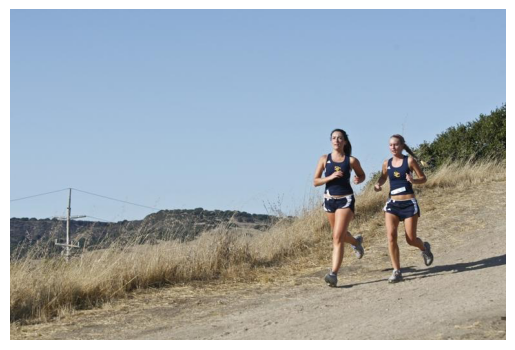

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取并显示图片
# /mnt/data1/workspace/wmq/YOLO-World/data/flickr/full_images/3359636318.jpg
image_path = '/mnt/data1/workspace/data/data/objects365v1/train/obj365_train_000000367456.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()


In [75]:
import torch
a = torch.load("/mnt/data1/workspace/data/data/rsvg/rsvg_train.pth")

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# len(os.listdir("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"))
for i in os.listdir("/mnt/data1/workspace/data/data/dior/JPEGImages-test"):
    img = mpimg.imread("/mnt/data1/workspace/data/data/dior/JPEGImages-test/" + str(i))
    print(img.shape)
# len(os.listdir("/mnt/data1/workspace/data/data/mmrs/data/detection/HRRSD/images"))

In [12]:
os.listdir("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes")[0]

'00616.xml'

In [5]:
import os
import xml.etree.ElementTree as ET

# 初始化categories字典，id从1开始
categories = {}
category_id = 1

# 遍历文件夹中的所有XML文件
annotations_path = "/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"
for path in os.listdir(annotations_path):
    if path.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_path, path))
        root = tree.getroot()

        # 遍历每个object元素
        for obj in root.findall("object"):
            category = obj.find("name").text  # 获取类别名称
            
            # 如果类别不在categories字典中，添加新类别并赋予新的ID
            if category not in categories:
                categories[category] = category_id
                category_id += 1  # 增加类别ID

# 输出最终的categories字典
print(categories)

{'vehicle': 1, 'windmill': 2, 'ship': 3, 'tenniscourt': 4, 'airplane': 5, 'overpass': 6, 'stadium': 7, 'groundtrackfield': 8, 'bridge': 9, 'basketballcourt': 10, 'baseballfield': 11, 'storagetank': 12, 'harbor': 13, 'golffield': 14, 'Expressway-toll-station': 15, 'trainstation': 16, 'Expressway-Service-area': 17, 'airport': 18, 'chimney': 19, 'dam': 20}


In [22]:
import os
import xml.etree.ElementTree as ET

# 遍历文件夹中的所有XML文件
annotations_path = "/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"
for path in os.listdir(annotations_path):
    if path.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_path, path))
        root = tree.getroot()

        # 遍历每个object元素
        for obj in root.findall("object"):
            # angle = float(obj.find("angle").text)  # 获取类别名称
            # if angle != 0:
            #     bbox = obj.find("robndbox")
            #     x1 = float(bbox.find("x_left_top").text)
            #     y1 = float(bbox.find("y_left_top").text)
            #     x2 = float(bbox.find("x_right_top").text)
            #     y2 = float(bbox.find("y_right_top").text)
            #     x3 = float(bbox.find("x_right_bottom").text)
            #     y3 = float(bbox.find("y_right_bottom").text)
            #     x4 = float(bbox.find("x_left_bottom").text)
            #     y4 = float(bbox.find("y_left_bottom").text)
            #     print(path, x1,y1,x2,y2,x3,y3,x4,y4, angle)
            diff = int(obj.find("difficult").text) 
            if diff > 0:
                print(path, diff)

In [14]:
import xml.etree.ElementTree as ET
dior_coco_format = {
    'images': [],
    'licenses': '',
    'categories': [],
    'annotations': [],
    'info': '',
    'type': ''
}
output_folder = "/mnt/data1/workspace/data/data/dior/all/annfiles"
os.makedirs(output_folder, exist_ok=True)
instance_id = 0

dior_coco_format['categories'] = [{'name': key.lower().replace('-', ''), 'id': value} for key, value in categories.items()]
for path in os.listdir("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"):
    txt_file = os.path.join(output_folder, os.path.splitext(path)[0] + '.txt')
    tree = ET.parse("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes/" + path)
    root = tree.getroot()
    
    with open(txt_file, 'w') as f:
        filename = root.find("filename").text
        image_id = int(filename.split('.')[0])
        for size in root.findall("size"):
            width = int(size.find("width").text)
            height = int(size.find("height").text)
        dior_coco_format['images'].append({'file_name': filename, 'id': image_id, 'height': height, 'width': width})
        
        for object in root.findall("object"):
            assert len(object.findall("robndbox"))==1
            bbox = object.find("robndbox")
            x1 = float(bbox.find("x_left_top").text)
            y1 = float(bbox.find("y_left_top").text)
            x2 = float(bbox.find("x_right_top").text)
            y2 = float(bbox.find("y_right_top").text)
            x3 = float(bbox.find("x_right_bottom").text)
            y3 = float(bbox.find("y_right_bottom").text)
            x4 = float(bbox.find("x_left_bottom").text)
            y4 = float(bbox.find("y_left_bottom").text)
            difficult = int(object.find('difficult').text)
            category_id = object.find("name").text
            assert category_id in categories.keys()
            dior_coco_format['annotations'].append({'id': instance_id, 'category_id':categories[category_id], 'bbox':[x1,y1,x2,y2,x3,y3,x4,y4], 'image_id': image_id, 'iscrowd': difficult})
            line = f"{x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4} {category_id.lower().replace('-', '')} {difficult}\n"
            f.write(line)
            instance_id+=1

In [26]:
import json
with open('/mnt/data1/workspace/data/data/dior/Annotations/dior_all.json', 'w') as file:
    json.dump(dior_coco_format, file)

In [27]:
len(dior_coco_format['annotations'])

192518

In [28]:
dior_coco_format['categories']

[{'name': 'vehicle', 'id': 1},
 {'name': 'windmill', 'id': 2},
 {'name': 'ship', 'id': 3},
 {'name': 'tenniscourt', 'id': 4},
 {'name': 'airplane', 'id': 5},
 {'name': 'overpass', 'id': 6},
 {'name': 'stadium', 'id': 7},
 {'name': 'groundtrackfield', 'id': 8},
 {'name': 'bridge', 'id': 9},
 {'name': 'basketballcourt', 'id': 10},
 {'name': 'baseballfield', 'id': 11},
 {'name': 'storagetank', 'id': 12},
 {'name': 'harbor', 'id': 13},
 {'name': 'golffield', 'id': 14},
 {'name': 'expresswaytollstation', 'id': 15},
 {'name': 'trainstation', 'id': 16},
 {'name': 'expresswayservicearea', 'id': 17},
 {'name': 'airport', 'id': 18},
 {'name': 'chimney', 'id': 19},
 {'name': 'dam', 'id': 20}]

In [11]:
output_folder = "/mnt/data1/workspace/data/data/dior/all/annfiles"
txt_files = []
for path in os.listdir("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"):
    txt_file = os.path.join(output_folder, os.path.splitext(path)[0] + '.txt')
    txt_files.append(txt_file)

In [ ]:
category = {}
for path in os.listdir("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes"):
    tree = ET.parse("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes/" + path)
    root = tree.getroot()
    for object in root.findall("object"):
        category = object.find("name").text
        category.update("")

In [4]:
import xml.etree.ElementTree as ET
tree = ET.parse("/mnt/data1/workspace/data/data/dior/Annotations/Oriented_Bounding_Boxes/" + '00616.xml')
root = tree.getroot()
for size in root.findall("size"):
    width = int(size.find("width").text)
    height = int(size.find("height").text)

In [6]:
for object in root.findall("object"):
    assert len(object.findall("robndbox"))==1
    bbox = object.find("robndbox")
    x1 = float(bbox.find("x_left_top").text)
    y1 = float(bbox.find("y_left_top").text)
    x2 = float(bbox.find("x_right_top").text)
    y2 = float(bbox.find("y_right_top").text)
    x3 = float(bbox.find("x_right_bottom").text)
    y3 = float(bbox.find("y_right_bottom").text)
    x4 = float(bbox.find("x_left_bottom").text)
    y4 = float(bbox.find("y_left_bottom").text)
    difficult = int(object.find('difficult').text)
    category_id = object.find("name").text

In [50]:

import json
with open('/mnt/data1/workspace/wmq/YOLO-World/data/coco/annotations/instances_val2017.json', 'r') as file:
    data = json.load(file)
print(data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [4]:
import cv2
import numpy as np

# 图像路径
image_path = '/mnt/data1/workspace/data/data/dior/JPEGImages-trainval/00616.jpg'

# 旋转框的四个顶点坐标
points = np.array([
    # [484.0, 498.0], 
    # [515.0, 498.0], 
    # [514.0, 592.0],
    # [482.0, 591.0],
    [119.0, 643.0],
    [147.0, 639.0],
    [159.0, 715.0],
    [132.0, 719.0]
], dtype=np.float32)

# 加载图像
image = cv2.imread(image_path)

# 计算旋转矩形的最小外接矩形
rect = cv2.minAreaRect(points)  # 获取旋转矩形的中心、宽高和旋转角度

# 获取矩形的四个顶点
box = cv2.boxPoints(rect)  # 获取旋转矩形的四个角
box = np.int0(box)  # 转换为整数

# # 绘制旋转矩形
cv2.polylines(image, [box], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.imwrite('hhh.jpg', image)


/tmp/ipykernel_3148175/3310518884.py:27: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # 转换为整数


True

In [2]:
box

array([[119, 643],
       [146, 638],
       [159, 715],
       [131, 719]])